In [1]:
# importing the required libraries
import numpy as np
from keras.datasets import mnist
from keras.models import load_model
from keras.utils import to_categorical
import keras 
import matplotlib.pyplot as plt

In [2]:
def load_dataset(name):
    # load dataset
    (trainX, trainY), (testX, testY) = name.load_data()
    # shape of dataset
    train_shape, test_shape = [trainX.shape, trainY.shape], [testX.shape, testY.shape]
    num_classes = len(np.unique(trainY))
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY, train_shape, test_shape

In [3]:
# processing the data
def data_process(trainX, testX):
    # convert from integers to floats
    trainX = trainX.astype('float32')
    testX = testX.astype('float32')
    # normalize to range 0-1
    trainX = trainX / 255.0
    testX = testX / 255.0
    trainX = trainX.reshape((len(trainX), np.prod(trainX.shape[1:])))
    testX = testX.reshape((len(testX), np.prod(testX.shape[1:])))
    # return normalized images
    return trainX, testX

In [4]:
# function that takes trainX, testX as input and outputs encoded trainX, testX
def encode(trainX, testX):
    trainX, testX = data_process(trainX, testX)
    # load encoder model
    encoder = load_model('../Autoencoders Model/encoder_model.keras')
    # encode the data
    trainX = encoder.predict(trainX)
    testX = encoder.predict(testX)
    return trainX, testX


In [5]:
# evaluating the model for mnist dataset
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY, train_shape, test_shape = load_dataset(mnist)
    # encoder the data
    encoded_imgs_train, encoded_imgs_test = encode(trainX, testX)
    # load model
    model = load_model('cnn_model.keras')
    # evaluate model on test dataset
    _, acc = model.evaluate(encoded_imgs_test, testY, verbose=0)
    print('> Accuracy: %.3f' % (acc * 100.0))
    return testX, testY

In [6]:
testX, testY = run_test_harness()

313/313 [==============================] - 1s 2ms/step
> Accuracy: 97.490


In [7]:
# names of the classes
names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [8]:
def prediction(images):
    # load encoder model
    model1 = load_model('../Autoencoders Model/encoder_model.keras')
    images, _ = data_process(images, images)
    # encode the images
    encoded_imgs = model1.predict(images)
    # load the model
    model2 = load_model('cnn_model.keras')
    result = model2.predict(encoded_imgs)
    # predict the classes
    result_classes = result.argmax(axis=-1)
    # return the predicted classes
    return result_classes


In [9]:
# plot 10 images from the test set and their predicted labels
np.random.seed(42)
def display_prediction(testX, testY):
    images = []
    labels = []
    for i in range(10):
        # select a random image
        index = np.random.randint(0, 1000)
        images.append(testX[index])
        labels.append(testY[index])

    images = np.array(images)
    labels = np.array(labels)
    # predict the classes
    result_classes = prediction(images)
    # plot the images and their predicted labels
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(names[result_classes[i]])
        plt.xticks([])
        plt.yticks([])
    plt.show()

1/1 [==============================] - 0s 33ms/step


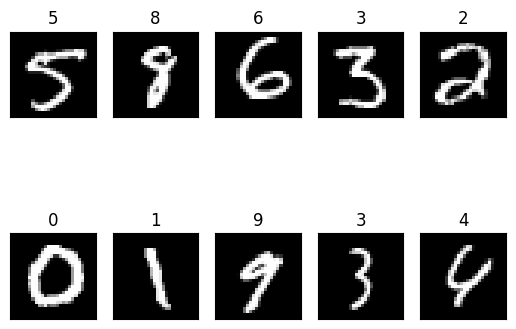

In [10]:
display_prediction(testX, testY)